###Import and show *dataset*

In [23]:
import pandas as pd
train = pd.read_csv("/content/cell2celltrain.csv")

In [24]:
df = pd.DataFrame(train)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

### HandsetPrice   51047 non-null  object
### its an integer column but he treats it as object , so we will convert it to integer


In [26]:
import numpy as np
print(df['HandsetPrice'].unique())

df['HandsetPrice'] = pd.to_numeric(df['HandsetPrice'], errors='coerce') # Convert 'HandsetPrice' to numeric dtype
print(df['HandsetPrice'].unique())


df.info()

['30' 'Unknown' '10' '80' '150' '300' '40' '200' '100' '130' '60' '400'
 '240' '250' '180' '500']
[ 30.  nan  10.  80. 150. 300.  40. 200. 100. 130.  60. 400. 240. 250.
 180. 500.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 

In [27]:
print(df.isnull().sum())
print("--------------------\n")
print(df.isnull().values.any())


CustomerID                       0
Churn                            0
MonthlyRevenue                 156
MonthlyMinutes                 156
TotalRecurringCharge           156
DirectorAssistedCalls          156
OverageMinutes                 156
RoamingCalls                   156
PercChangeMinutes              367
PercChangeRevenues             367
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                     24
Handsets                         1
HandsetModels       

### convert churn column into numerical column

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Iterate over each column in the DataFrame
for c in df.columns:
   # Check if the dtype of the column is object
   if df.dtypes[c] == object:
   # Fit label encoder and transform the column
    le.fit(df[c].astype(str))
    df[c] = le.transform(df[c].astype(str))

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

##Its useless column, so we will drop it

In [29]:
df.drop(columns=['HandsetPrice'], inplace=True)

###Filling the nul cells with knn teqnique

In [30]:
from sklearn.impute import KNNImputer
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].isnull().any():
        imputer = KNNImputer(n_neighbors=2)
        df[[col]] = imputer.fit_transform(df[[col]])

print(df.isnull().sum())

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [31]:
#check if there is duplicated value
print(df.duplicated().sum())

0


##Correlation Matrix for Check for useless columns

<Figure size 1200x1000 with 0 Axes>

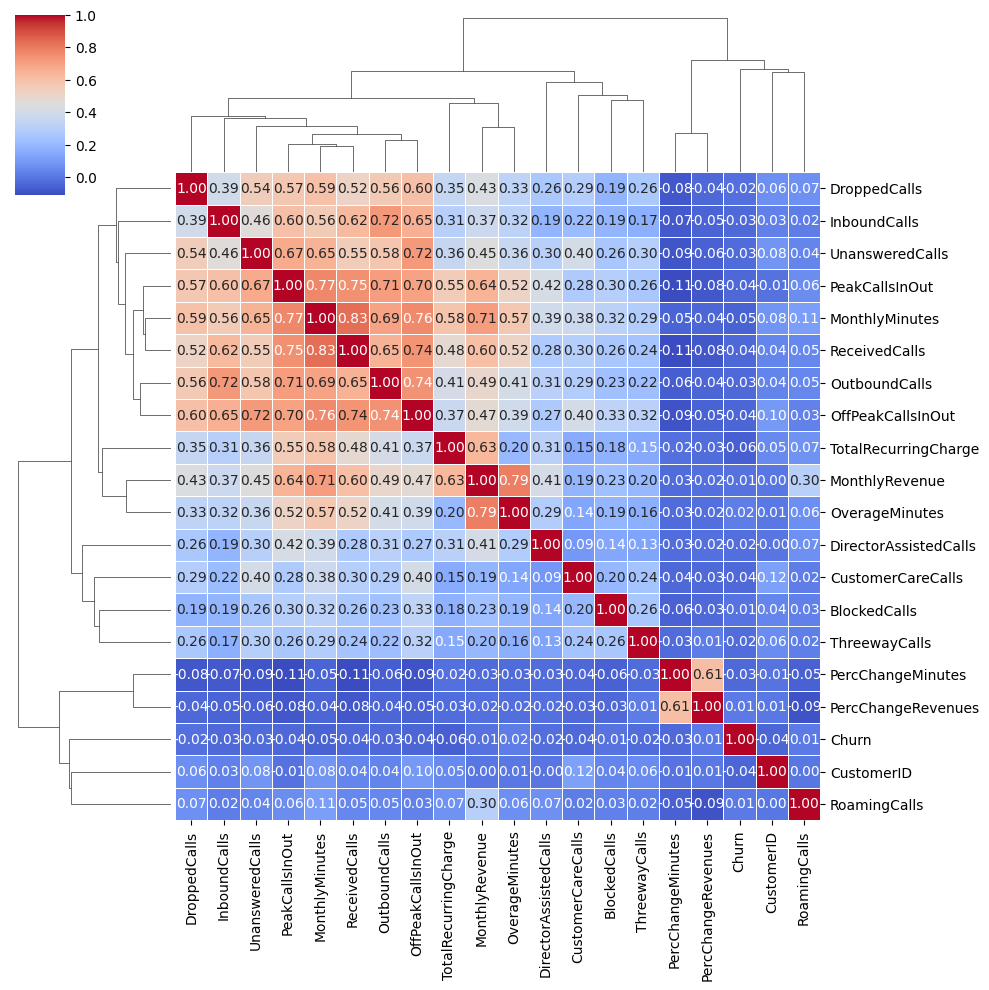

<Figure size 1200x1000 with 0 Axes>

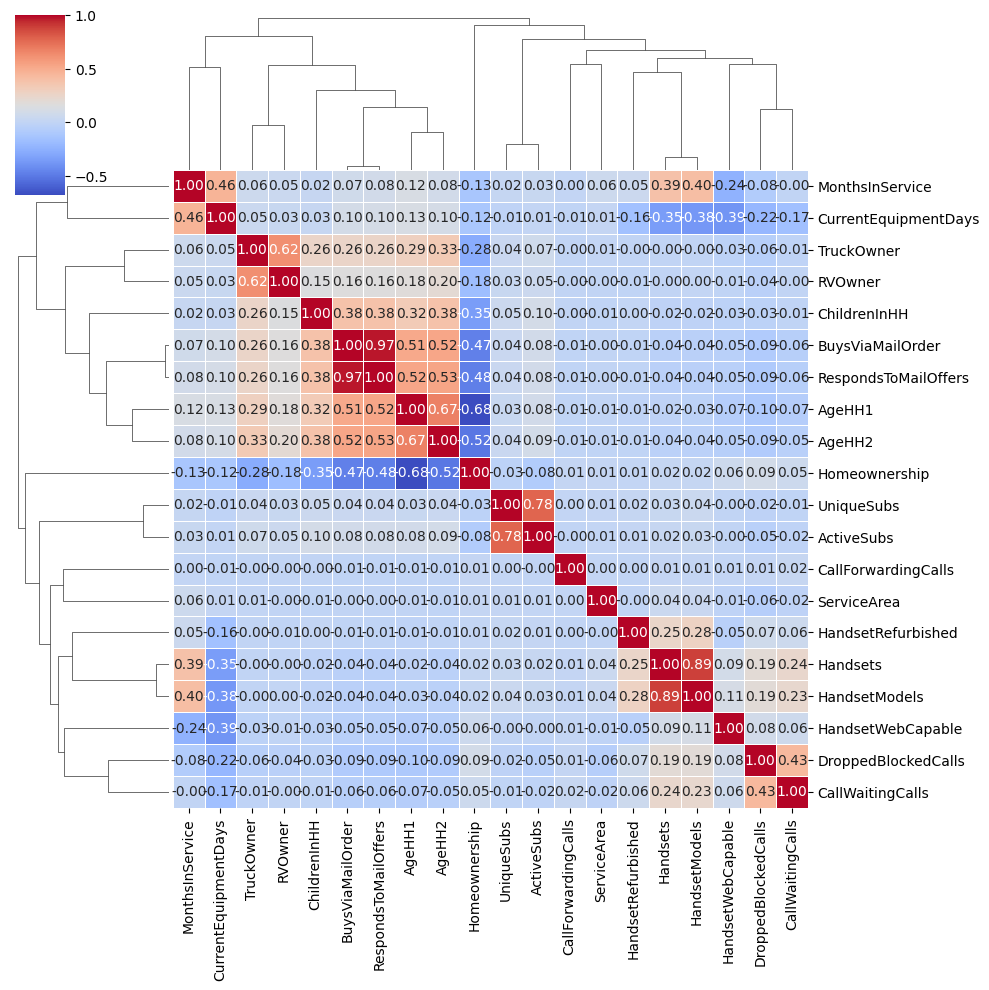

<Figure size 1200x1000 with 0 Axes>

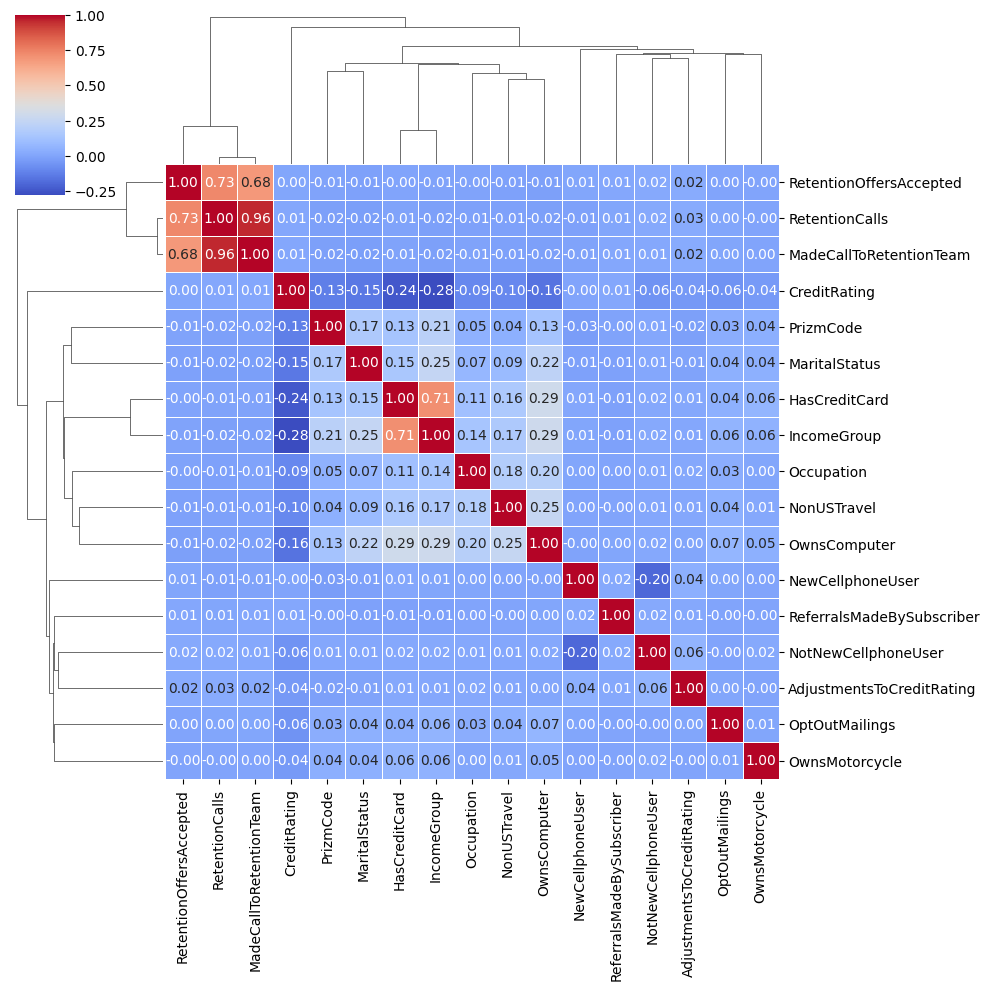

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of columns per plot
cols_per_plot = 20

# Iterate over the columns in chunks of cols_per_plot
for i in range(0, len(df.columns), cols_per_plot):
    subset_df = df.iloc[:, i:i+cols_per_plot]
    corr_matrix = subset_df.corr()

    # Plot the clustered correlation matrix
    plt.figure(figsize=(12, 10))
    sns.clustermap(corr_matrix, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f")
    plt.show()


## As you can see there is alot of columns that have weak correlation and non usefull informations so we will drop them


In [33]:
columns_to_drop = ['CustomerID', 'PercChangeMinutes', 'PercChangeRevenues','RoamingCalls','UniqueSubs','ActiveSubs','CallForwardingCalls','ServiceArea','ReferralsMadeBySubscriber','AdjustmentsToCreditRating','OptOutMailings','OwnsMotorcycle','NewCellphoneUser','NotNewCellphoneUser']
df.drop(columns=columns_to_drop, inplace=True)
X=df.drop(columns=['Churn'])
y=df['Churn']

dataset shape: Counter({0: 36336, 1: 14711})


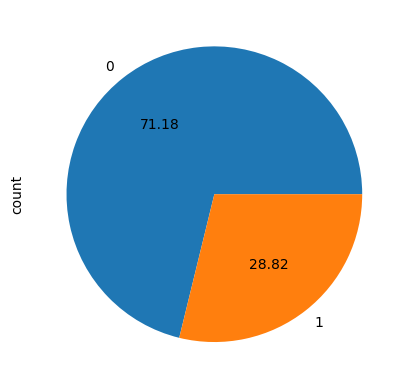

In [34]:
from collections import Counter
y.value_counts().plot.pie(autopct='%.2f')
print('dataset shape:', Counter(y))



dataset shape: Counter({0: 18388, 1: 14711})


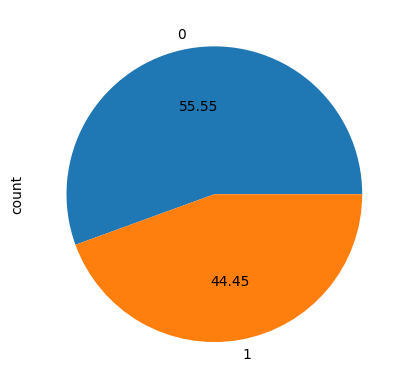

In [35]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, sampling_strategy=0.8)

# Apply undersampling to your data
X_train_undersampled, y_train_undersampled = undersample.fit_resample(X, y)

# Visualize the class distribution
y_train_undersampled.value_counts().plot.pie(autopct='%.2f')
print('dataset shape:', Counter(y_train_undersampled))


In [36]:
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_undersampled, y_train_undersampled)

y_train_resampled.value_counts().plot.pie(autopct='%.2f')
print('dataset shape:', Counter(y_train_resampled))
'''



"\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=42)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train_undersampled, y_train_undersampled)\n\ny_train_resampled.value_counts().plot.pie(autopct='%.2f')\nprint('dataset shape:', Counter(y_train_resampled))\n"

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_undersampled, y_train_undersampled, test_size=0.3, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ANN model

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

ann = Sequential()

ann.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

ann.add(Dense(units=32, activation='relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units=16, activation='relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units=1, activation='sigmoid'))


ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = ann.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint_callback, early_stopping]
)

ann.summary()



Epoch 1/50
571/580 [============================>.] - ETA: 0s - loss: 0.6096 - accuracy: 0.6654
Epoch 1: val_loss improved from inf to 0.55918, saving model to best_model.keras
580/580 [==============================] - 5s 5ms/step - loss: 0.6088 - accuracy: 0.6661 - val_loss: 0.5592 - val_accuracy: 0.7037
Epoch 2/50
560/580 [===========================>..] - ETA: 0s - loss: 0.5646 - accuracy: 0.7089
Epoch 2: val_loss improved from 0.55918 to 0.55185, saving model to best_model.keras
580/580 [==============================] - 2s 3ms/step - loss: 0.5649 - accuracy: 0.7081 - val_loss: 0.5518 - val_accuracy: 0.7085
Epoch 3/50
580/580 [==============================] - ETA: 0s - loss: 0.5559 - accuracy: 0.7137
Epoch 3: val_loss improved from 0.55185 to 0.54934, saving model to best_model.keras
580/580 [==============================] - 2s 3ms/step - loss: 0.5559 - accuracy: 0.7137 - val_loss: 0.5493 - val_accuracy: 0.7050
Epoch 4/50
570/580 [============================>.] - ETA: 0s - loss

### ANN evaluation


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

prob_predictions = ann.predict(X_test)

y_pred_ann = (prob_predictions > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

print('Accuracy =',accuracy)
print('precision =',precision)
print('recall =',recall)
print('f1 =',f1)

conf_matrix = confusion_matrix(y_test, y_pred_ann)
print('Confusion Matrix:')
print(conf_matrix)



311/311 [==============================] - 1s 2ms/step
Accuracy = 0.7293051359516616
precision = 0.8955710955710956
recall = 0.4380843785632839
f1 = 0.5883614088820827
Confusion Matrix:
[[5321  224]
 [2464 1921]]


### Randome Forest model


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Accuracy: 0.7375629405840887
Precision: 0.80327309921582
Recall: 0.5372862029646522
F1-score: 0.6438917737086636


###Randome Search


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid for RandomForestClassifier
param_dist = {
    'n_estimators': randint(50, 200 + 1),  # Number of trees in the forest
    'max_depth': randint(10, 50 + 1),  # Maximum depth of the tree
    'min_samples_split': randint(2, 10 + 1),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 4 + 1),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# Instantiate the RandomForest classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best estimator
best_rf_model = random_search.best_estimator_

# Make predictions
rf_predictions = best_rf_model.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')

# Get predicted probabilities for the positive class
rf_prob = best_rf_model.predict_proba(X_test)
rf_prob_positive_class = rf_prob[:, 1]

# Calculate ROC AUC score
rf_auc = roc_auc_score(y_test, rf_prob_positive_class)

# Print evaluation metrics
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)
print("ROC AUC:", rf_auc)

# Get the best parameters chosen by RandomizedSearchCV
best_params_rf = random_search.best_params_

# Print the best parameters
print("Best Parameters for Random Forest:", best_params_rf)


Accuracy: 0.7413897280966767
Precision: 0.764544009642953
Recall: 0.7413897280966767
F1 Score: 0.7273451367433222
ROC AUC: 0.7960335515472556
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 181}


In [60]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint


# Define the parameter grid
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': randint(100, 1000)
}

# Create an instance of the model
mlp = MLPClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (781) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters:  {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 430, 'solver': 'adam'}
Best Score:  0.7151795943998603


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (781) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.7228600201409869
Precision: 0.810102544625902
Recall: 0.4864310148232611
F1-score: 0.6078654887432318
